In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, sys, json, cv2
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

import shutil

# Image resize
- 모든 이미지를 (500,500) 으로 변경 후 쓰레기 파일 걸러줌

In [ ]:
# normal & fat file  
nor_file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/학습할 이미지/리트리버/리트리버_정상'
fat_file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/학습할 이미지/리트리버/리트리버_비만'
nor_file = os.listdir(nor_file_path)
fat_file = os.listdir(fat_file_path)

In [ ]:
img = cv2.imread('/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/학습할 이미지/리트리버/리트리버_정상/1.jpg')
img

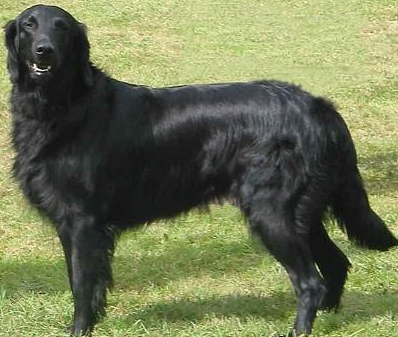

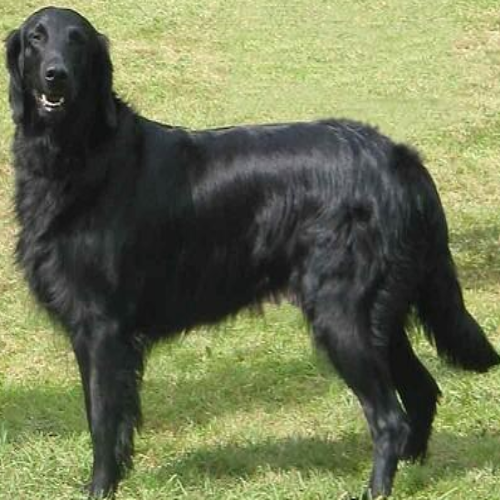

True

In [ ]:
dst = cv2.resize(img, dsize=(500,500))
cv2_imshow(img)
cv2_imshow(dst)

# cv2.imwrite('/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/nor_retriever/1.jpg',dst)

# 이미지 처리

## 이미지 흑백 처리

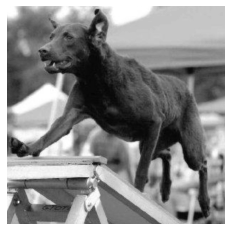

(500, 500)

In [ ]:
# 흑백처리
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/nor_retriever/1.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
plt.imshow(image, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()
type(image) # 데이터 타입을 확인
image # 이미지 데이터를 확인
image.shape # 차원을 확인 (해상도)

## 이미지 색상값 / 255 (완)

In [ ]:
####  모든 이미지 스케일링 (이미지 색상 값 /255)  ####
def div255(name, file_path, save_path):
  file = os.listdir(file_path)

  for img_name in file:
    image = cv2.imread(f"{file_path}/{img_name}")
    image = image/255
    cv2.imwrite(f'{save_path}/div255_{name}_{img_name}',image)

## 정상
name = 'nor'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/nor_retriever'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/div255/div255_nor'
div255(name,file_path, save_path)

## 비만
name = 'fat'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/fat_retriever'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/div255/div255_fat'
div255(name,file_path, save_path)

## 이미지 투명도 처리 (완)
- 이미지를 흐리게 하기 위해 픽셀을 주변 픽센의 평균값으로 변환
- 커널의 크기가 클수록 이미지가 더 부드러워짐
  - 커널 : 주변 픽셀에 수행되는 연산을 수학적으로 이르는 말
  - 커널의 크기는 흐림의 정도 (커널의 크기가 클수록 이미지가 더 부드러워짐)
- 커널은 이미지를 선명하게 하는 것부터 경계선 감지까지 이미지 처리 작업을 하는데 널리 사용됨

--------------------------------------------------------
- 이미지를 흐리게 한 후 가우시안 블러를 적용한게 효과있어보임

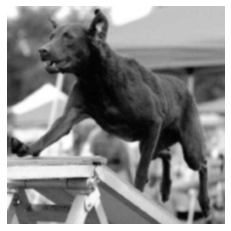

In [ ]:
# 이미지 투명도 처리
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/nor_retriever/1.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
#각 픽셀 주변의 5X5커널 평균값으로 이미지를 흐리게 함
image_blurry = cv2.blur(image, (5,5))
plt.imshow(image_blurry, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()


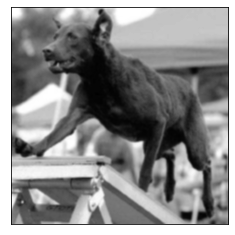

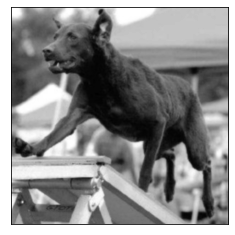

In [ ]:
kernel = np.ones((5,5)) / 25.0 # 커널 생성
kernel # 커널 확인
image_kernel = cv2.filter2D(image, -1, kernel) # 커널 적용
plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([]) # 이미지 출력
plt.show()

##### good!
image_very_blurry = cv2.GaussianBlur(image, (5,5), 0) # 가우시안 블러를 적용
plt.imshow(image_very_blurry, cmap="gray"), plt.xticks([]), plt.yticks([]) # 이미지 출력
plt.show()

In [ ]:
####  모든 이미지 가우시안 블러 적용 (흑백처리 X)  ####
def GaussianBlur(name, file_path, save_path):
  file = os.listdir(file_path)

  for img_name in file:
    image = cv2.imread(f"{file_path}/{img_name}")
    #각 픽셀 주변의 5X5커널 평균값으로 이미지를 흐리게 
    image_very_blurry = cv2.GaussianBlur(image, (5,5), 0) # 가우시안 블러를 적용
    cv2.imwrite(f'{save_path}/GaussianBlur_{name}_{img_name}',image_very_blurry)

## 정상
name = 'nor'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/nor_retriever'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/GaussianBlur/GaussianBlur_nor'
GaussianBlur(name,file_path, save_path)

## 비만
name = 'fat'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/fat_retriever'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/GaussianBlur/GaussianBlur_fat'
GaussianBlur(name,file_path, save_path)

In [ ]:
####  모든 이미지 가우시안 블러 적용 ( 흑백처리 O )  ####
def Grayscale_GaussianBlur(name, file_path, save_path):
  file = os.listdir(file_path)

  for img_name in file:
    image = cv2.imread(f"{file_path}/{img_name}", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
    #각 픽셀 주변의 5X5커널 평균값으로 이미지를 흐리게 
    image_very_blurry = cv2.GaussianBlur(image, (5,5), 0) # 가우시안 블러를 적용
    cv2.imwrite(f'{save_path}/Grayscale_GaussianBlur_{name}_{img_name}',image_very_blurry)

## 정상
name = 'nor'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/nor_retriever'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/Graysclae_GaussianBlur/Grayscale_GaussianBlur_nor'
Grayscale_GaussianBlur(name,file_path, save_path)

## 비만
name = 'fat'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/fat_retriever'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/Graysclae_GaussianBlur/Grayscale_GaussianBlur_fat'
Grayscale_GaussianBlur(name,file_path, save_path)

## 이미지 선명하게 (완)

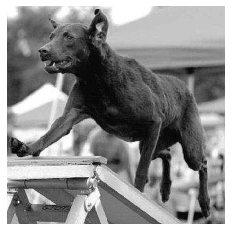

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("/content/drive/MyDrive/멀티캠퍼스/3조/이경희/이미지전처리/retriever_resize(500,500)/nor_retriever/1.jpg",cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]]) # 커널을 만듦

# 이미지를 선명하게 만듦
image_sharp = cv2.filter2D(image, -1, kernel)

plt.imshow(image_sharp, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

In [ ]:
#### 모든 이미지 선명하게  - set_1
def sharp(name, file_path, save_path):
  file = os.listdir(file_path)

  for img_name in file:
    image = cv2.imread(f"{file_path}/{img_name}") 
    kernel = np.array([[0, -1, 0],
                    [-1, 5,-1],
                    [0, -1, 0]]) # 커널 생성
    # 이미지를 선명하게 만듦
    image_sharp = cv2.filter2D(image, -1, kernel)
    # save
    cv2.imwrite(f'{save_path}/sharp_{name}_{img_name}',image_sharp)

## 정상
name = 'nor'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/nor_retriever'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/Sharp/Sharp_nor'
sharp(name,file_path, save_path)

## 비만
name = 'fat'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/fat_retriever'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/Sharp/Sharp_fat'
sharp(name,file_path, save_path)

In [ ]:
#### 모든 이미지 흑백 처리 후 선명하게   - set_3
def Grayscale_sharp(name, file_path, save_path):
  file = os.listdir(file_path)

  for img_name in file:
    image = cv2.imread(f"{file_path}/{img_name}",cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
    kernel = np.array([[0, -1, 0],
                    [-1, 5,-1],
                    [0, -1, 0]]) # 커널 생성
    # 이미지를 선명하게 만듦
    image_sharp = cv2.filter2D(image, -1, kernel)
    # save
    cv2.imwrite(f'{save_path}/Grayscale_sharp_{name}_{img_name}',image_sharp)

## 정상
name = 'nor'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/nor_retriever'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/Grayscale_sharp/Grayscale_sharp_nor'
Grayscale_sharp(name,file_path, save_path)

## 비만
name = 'fat'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/fat_retriever'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/Grayscale_sharp/Grayscale_sharp_fat'
Grayscale_sharp(name,file_path, save_path)

## 이미지 대비 높이기 (완)

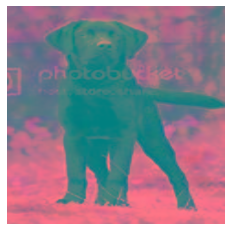

In [ ]:
image_bgr = cv2.imread("/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize(500,500)/nor_retriever/5.jpg") # 이미지 로드
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV) # YUV로 변경합니다.
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # 히스토그램 평활화를 적용
# image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB) # RGB로 바꿉니다.
plt.imshow(image_yuv), plt.axis("off") # 이미지 출력
plt.show()

In [ ]:
#### 선명하게 한 후 이미지 대비 높이기  #### 
def sharp_contrast(name, file_path, save_path):
  file = os.listdir(file_path)
  i = 0
  for img_name in file:
    image_bgr = cv2.imread(f"{file_path}/{img_name}") # 이미지 로드
    image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV) # YUV로 변경
    image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # 히스토그램 평활화 적용
    # image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB) # RGB로 바꿔주지 않을거임
    # save
    i+=1
    cv2.imwrite(f'{save_path}/sharp_contrast_{i}.jpg',image_yuv)

## 정상
name = 'nor'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/리트리버/set_1/전처리_정상'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/contrast/sharp_contrast_nor'
sharp_contrast(name,file_path, save_path)

## 비만
name = 'fat'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/리트리버/set_1/전처리_비만'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/contrast/sharp_contrast_fat'
sharp_contrast(name,file_path, save_path)

## 색상 구분
- 이미지에서 한 색상을 구분하기 위해서는 색 범위를 정의하고 이미지에 마스크를 적용함
-  이미지를 HSV(색상, 채도, 명도)로 변환 -> 격리시킬 값의 범위를 정의 -> 이미지에 적용할 마스크를 만듦
- bitwise_and()는 마스크를 적용하고 원하는 포맷으로 변환



## 이미지 이진화
- 이미지 이진화(임계처리)thresholding은 어떤 값보다 큰 값을 가진 픽셀을 흰색으로 만들고 작은 값을 가진 픽셀은 검은색으로 만드는 과정
- 적응적 이진화(임계처리)adaptive thresholding은 픽셀의 임계값이 주변 픽셀의 강도에 의해 결정됨
- 이진화는 이미지 안의 영역 마다 빛 조건이 달라질 때 도움이 됩니다.
- adaptiveThreshold()의 max_output_value매개변수는 출력 픽셀 강도의 최대값을 결정
- cv2.ADAPTIVE_THRESH_GAUSSIAN_C는 픽셀의 임계값을 주변 픽셀 강도의 가중치 합으로 설정
- cv2.ADAPTIVE_THRESH_MEAN_C는 픽셀의 임계값을 주변 픽셀의 평균으로 설정


## 경계선 감지 (완)
- 캐니(Canny) 경계선 감지기와 같은 경계선 감지 기술 사용
- 경계선 감지는 컴퓨터 비전의 주요 관심 대상이며 경계선은 많은 정보가 담긴 영역입니다.
- 경계선 감지를 사용하여 정보가 적은 영역을 제거하고 대부분의 정보가 담긴 이미지 영역을 구분할 수 있습니다.
- 캐니 감지기는 그레이디언트 임계값의 저점과 고점을 나타내는 두 매개변수가 필요합니다.
- 낮은 임계값과 높은 임계값 사이의 가능성 있는 경계선 픽셀은 약한 경계선 픽셀로 간주됩니다
- OpenCV의 Canny 함수는 낮은 임곗값과 높은 임곗값이 필수 매개변수입니다.
- Canny를 전체 이미지 모음에 적용하기 전에 몇 개의 이미지를 테스트하여 낮은 임계값과 높은 임곗값의 적절한 쌍
을 찾는 것이 좋은 결과를 만듭니다.
- 예제 실습은 낮은 임곗값과 높은 임곗값을 이미지 중간 픽셀 강도의 1표준편차 아래 값과 위 값으로 설정

------------------------------------------------------------
- 흑백 처리 후 가우시안 블러처리를 한 이미지에 캐니 경계선 감지기 적용 (완)
- ~~


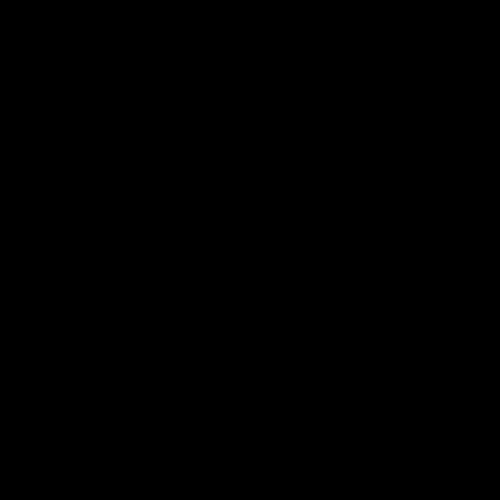

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_gray = cv2.imread("/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/리트리버/set_5/전처리_비만/sharp_contrast_.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
median_intensity = np.median(image_gray) # 픽셀 강도의 중간값을 계산

# 중간 픽셀 강도에서 위아래 1 표준 편차 떨어진 값을 임계값으로 지정합니다.
lower_threshold = int(max(0, (1.0 - 0.2) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.2) * median_intensity))

# 캐니 경계선 감지기를 적용합니다.
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

# plt.imshow(image_canny, cmap="gray"), plt.axis("off") # 이미지 출력
# plt.show()
cv2_imshow(image_canny)

In [ ]:
####### 흑백 처리 후 가우시안 블러 적용 된 이미지의 경계선 감지   #####
def Gray_GaussianBlur_canny(name, file_path, save_path):
  file = os.listdir(file_path)
  i = 0
  for img_name in file:
    image_gray = cv2.imread(f"{file_path}/{img_name}", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
    median_intensity = np.median(image_gray) # 픽셀 강도의 중간값을 계산

    # 중간 픽셀 강도에서 위아래 1 표준 편차 떨어진 값을 임계값으로 지정
    lower_threshold = int(max(0, (1.0 - 0.2) * median_intensity))
    upper_threshold = int(min(255, (1.0 + 0.2) * median_intensity))
    # 캐니 경계선 감지기를 적용
    image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)
    # cv2_imshow(image_canny)
    
    # save
    i += 1
    cv2.imwrite(f'{save_path}/Gray_Gaussian_canny_{name}_{i}.jpg',image_canny)

## 정상
name = 'nor'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/리트리버/set_4/전처리_정상'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/리트리버/set_7/전처리_정상'
Gray_GaussianBlur_canny(name,file_path, save_path)

## 비만
name = 'fat'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/리트리버/set_4/전처리_비만'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/리트리버/set_7/전처리_비만'
Gray_GaussianBlur_canny(name,file_path, save_path)

## 모서리 감지
- 파라미터 조정 및 여러 방법으로 전처리 시도 중

/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:489: RuntimeWarning: overflow encountered in add
  A_resampled += a_min


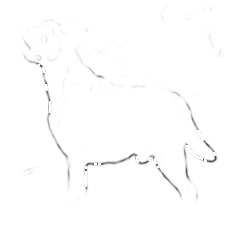

In [ ]:
# GausianBlur 처리 후 모서리 감지
image_bgr = cv2.imread("/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/리트리버/set_2/전처리_비만/GaussianBlur_fat_9.jpg")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY) # 흑백으로 변경
image_gray = np.float32(image_gray)

block_size = 5 # 모서리 감지 매개변수를 설정
aperture = 29
free_parameter = 7


detector_responses = cv2.cornerHarris(image_gray,
                                      block_size,
                                      aperture,
                                      free_parameter) # 모서리를 감지
detector_responses = cv2.dilate(detector_responses, None) # 모서리 표시를 부각시킴
# 가능성이 높은 모서리를 출력
plt.imshow(detector_responses, cmap='gray'), plt.axis("off")
plt.show()

In [ ]:
#### 이미지의 모서리 감지 
def Gray_GaussianBlur_canny(name, file_path, save_path):
  file = os.listdir(file_path)
  i = 0
  for img_name in file:
    image_gray = cv2.imread(f"{file_path}/{img_name}", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
    median_intensity = np.median(image_gray) # 픽셀 강도의 중간값을 계산

    # 중간 픽셀 강도에서 위아래 1 표준 편차 떨어진 값을 임계값으로 지정
    lower_threshold = int(max(0, (1.0 - 0.2) * median_intensity))
    upper_threshold = int(min(255, (1.0 + 0.2) * median_intensity))
    # 캐니 경계선 감지기를 적용
    image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)
    # cv2_imshow(image_canny)
    
    # save
    i += 1
    cv2.imwrite(f'{save_path}/Gray_Gaussian_canny_{name}_{i}.jpg',image_canny)

## 정상
name = 'nor'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/리트리버/set_4/전처리_정상'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/리트리버/set_7/전처리_정상'
Gray_GaussianBlur_canny(name,file_path, save_path)

## 비만
name = 'fat'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/리트리버/set_4/전처리_비만'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/리트리버/set_7/전처리_비만'
Gray_GaussianBlur_canny(name,file_path, save_path)

## 상하좌우 80% 다듬기
- resize 전 이미지에서 중심점을 구한 후 이를 기준으로 상하좌우로 80%까지 사진 자르기

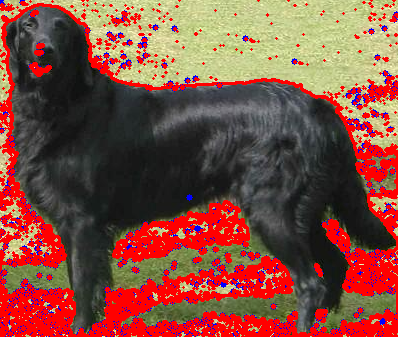

In [ ]:
######## 윤곽선 검출   ######
import cv2

src = cv2.imread("/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/학습할 이미지/리트리버/리트리버_정상/1.jpg")
dst = src.copy()

gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
ret, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

for i in contours:
  M = cv2.moments(i)

  try : cX = int(M['m10'] / M['m00'])
  except : cX = 0
  try : cY = int(M['m01'] / M['m00'])
  except : cY = 0
    
  cv2.circle(dst, (cX, cY), 3, (255, 0, 0), -1)
  cv2.drawContours(dst, [i], 0, (0, 0, 255), 2)

cv2_imshow(dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

(318, 364, 3)


(<matplotlib.image.AxesImage at 0x7fde92395a90>, (-0.5, 363.5, 317.5, -0.5))

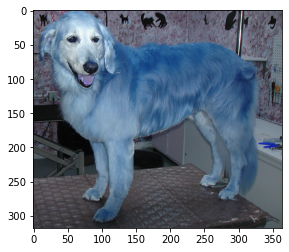

In [ ]:
#######  사진의 비율에 따라 강아지 몸통 위주로 이미지 자르기 #######
image = cv2.imread("/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/학습할 이미지/리트리버/리트리버_정상/450.jpg")
print(image.shape)
h, w = image.shape[0], image.shape[1]

if w >= h * 1.5 : # 가로로 긴 사진일 경우 
  x, y = int( w * 0.01), int( h * 0.1 )   # 기준점 - 왼쪽 아래를 기준으로 함
  w, h = int( w * 0.9 ), int( h * 0.85 )   # 자르길 원하는 길이만큼 
  img_trim = image[ y:y+h, x:x+w ]
elif h >= w * 1.7 :  # 세로로 긴 사진일 경우
  x, y = int( w * 0.05 ), int( h * 0.9 )  
  w, h = int( w * 0.95 ), int( h * 0.2 ) 
  img_trim = image[ h:y+h, x:x+w ] 
elif h >= w * 1.5 :  # 세로로 긴 사진일 경우
  x, y = int( w * 0.05 ), int( h * 0.8 )  
  w, h = int( w * 0.9 ), int( h * 0.15 ) 
  img_trim = image[ h:y+h, x:x+w ] 
else : 
  img_trim = image
plt.imshow(image), plt.axis("on")
plt.imshow(img_trim), plt.axis("on")

In [ ]:
####### [ 모든 이미지 ] 사진의 비율에 따라 강아지 몸통 위주로 이미지 자르기  ########
def img_trim(name, file_path, save_path) :
  for img_name in os.listdir(file_path):
    image = cv2.imread(f"{file_path}/{img_name}")
    
    h, w = image.shape[0], image.shape[1]

    if w >= h * 1.5 : # 가로로 긴 사진일 경우 
      x, y = int( w * 0.01), int( h * 0.1 )   # 기준점 - 왼쪽 아래를 기준으로 함
      w, h = int( w * 0.9 ), int( h * 0.85 )   # 자르길 원하는 길이만큼 
      img_trim = image[ y:y+h, x:x+w ]
    elif h >= w * 1.7 :  # 세로로 긴 사진일 경우
      x, y = int( w * 0.05 ), int( h * 0.9 )  
      w, h = int( w * 0.95 ), int( h * 0.2 ) 
      img_trim = image[ h:y+h, x:x+w ] 
    elif h >= w * 1.5 :  # 세로로 긴 사진일 경우
      x, y = int( w * 0.05 ), int( h * 0.8 )  
      w, h = int( w * 0.9 ), int( h * 0.15 ) 
      img_trim = image[ h:y+h, x:x+w ] 
    else : 
      img_trim = image

    cv2.imwrite(f'{save_path}/trim_{name}_{img_name}',img_trim)
  
# normal
name = 'nor'
nor_file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/학습할 이미지/리트리버/리트리버_정상'
nor_save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_trim/nor_retriever'
img_trim(name, nor_file_path, nor_save_path)

# fat
name = 'fat'
fat_file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/학습할 이미지/리트리버/리트리버_비만'
fat_save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_trim/fat_retriever'
img_trim(name, fat_file_path, fat_save_path)

In [ ]:
## 이미지 사이즈가 어떤지
#### 정상
nor_file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_trim/nor_retriever'
widths, heights = [], []
for img_name in os.listdir(nor_file_path):
  image = cv2.imread(f"{nor_file_path}/{img_name}")
  h, w = image.shape[0], image.shape[1]

  widths.append(w)
  heights.append(h)

nor_size_df = {'widths' : widths, 'heights' : heights}  
nor_size_df = pd.DataFrame(nor_size_df) 


#### 비만
fat_file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_trim/fat_retriever'
widths, heights = [], []
for img_name in os.listdir(fat_file_path):
  image = cv2.imread(f"{fat_file_path}/{img_name}")
  h, w = image.shape[0], image.shape[1]

  widths.append(w)
  heights.append(h)

fat_size_df = {'widths' : widths, 'heights' : heights}
fat_size_df = pd.DataFrame(fat_size_df) 

In [ ]:
nor_size_df.describe()  # 평균  - w : 231, h : 225
fat_size_df.describe()  # 평균  - w : 224, h : 186

,widths,heights
count,405.000000,405.000000
mean,224.523457,186.975309
std,140.245603,113.669202
min,58.000000,54.000000
25%,145.000000,122.000000
50%,182.000000,156.000000
75%,243.000000,195.000000
max,916.000000,657.000000


In [ ]:
###  이미지 사이즈 200 x 200 으로 
def img_resize(file_path, save_path):
  file = os.listdir(file_path)

  for img_name in file:
    img = cv2.imread(f'{file_path}/{img_name}')
    dst = cv2.resize(img, dsize=(200,200))
    # save
    cv2.imwrite(f'{save_path}/{img_name}',dst)
  
# normal
nor_file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_trim/nor_retriever'
nor_save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_trim_resize(200,200)/nor_trim_retriever'
img_resize(nor_file_path, nor_save_path)

# fat
fat_file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_trim/fat_retriever'
fat_save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_trim_resize(200,200)/fat_trim_retriever'
img_resize(fat_file_path, fat_save_path)

In [ ]:
#### 모든 이미지 선명하게  - trim_set_1
def sharp(name, file_path, save_path):
  file = os.listdir(file_path)

  for img_name in file:
    image = cv2.imread(f"{file_path}/{img_name}") 
    kernel = np.array([[0, -1, 0],
                    [-1, 5,-1],
                    [0, -1, 0]]) # 커널 생성
    # 이미지를 선명하게 만듦
    image_sharp = cv2.filter2D(image, -1, kernel)
    # save
    cv2.imwrite(f'{save_path}/trim_sharp_{name}_{img_name}',image_sharp)

## 정상
name = 'nor'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_trim_resize(200,200)/nor_trim_retriever'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/trim_set_1/trim_sharp_nor'
sharp(name,file_path, save_path)

## 비만
name = 'fat'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_trim_resize(200,200)/fat_trim_retriever'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/trim_set_1/trim_sharp_fat'
sharp(name,file_path, save_path)

In [ ]:
####  모든 이미지 가우시안 블러 적용  ####   - trim_set_2
def GaussianBlur(name, file_path, save_path):
  file = os.listdir(file_path)

  for img_name in file:
    image = cv2.imread(f"{file_path}/{img_name}")
    #각 픽셀 주변의 5X5커널 평균값으로 이미지를 흐리게 
    image_very_blurry = cv2.GaussianBlur(image, (5,5), 0) # 가우시안 블러를 적용
    cv2.imwrite(f'{save_path}/trim_GaussianBlur_{name}_{img_name}',image_very_blurry)

## 정상
name = 'nor'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_trim_resize(200,200)/nor_trim_retriever'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/trim_set_2/trim_GaussianBlur_nor'
GaussianBlur(name,file_path, save_path)

## 비만
name = 'fat'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_trim_resize(200,200)/fat_trim_retriever'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/trim_set_2/trim_GaussianBlur_fat'
GaussianBlur(name,file_path, save_path)

In [ ]:
#### 선명하게 전처리 한 후 이미지 대비 높이기     - trim_set_5
def sharp_contrast(name, file_path, save_path):
  file = os.listdir(file_path)
  i = 0
  for img_name in file:
    image_bgr = cv2.imread(f"{file_path}/{img_name}") # 이미지 로드
    image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV) # YUV로 변경
    image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # 히스토그램 평활화 적용
    # image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB) # RGB로 바꿔주지 않을거임
    # save
    i+=1
    cv2.imwrite(f'{save_path}/trim_sharp_contrast_{i}.jpg',image_yuv)

## 정상
name = 'nor'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/trim_set_1/trim_sharp_nor'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/trim_set_5/trim_sharp_contrast_nor'
sharp_contrast(name,file_path, save_path)

## 비만
name = 'fat'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/trim_set_1/trim_sharp_fat'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/trim_set_5/trim_sharp_contrast_fat'
sharp_contrast(name,file_path, save_path)

## 정방형으로 자르기
- 원본 이미지를 정방형으로 자르고 
- set_5와 같이 동일한 방식 적용

In [ ]:
fat = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/학습할 이미지/리트리버/리트리버_비만'
for img_name in os.listdir(fat):
  image = cv2.imread(f'{fat}/{img_name}')
  h, w = image.shape[0], image.shape[1]
  print(h,w)

In [ ]:
import os, sys, json, cv2
import pandas as pd
import numpy as np

# trim 함수  (정방형으로 잘라오기)
def trim_images(name, file_path, save_path):
    i = 1
    for img_name in os.listdir(file_path):
        image = cv2.imread(f'{file_path}/{img_name}')

        # width & height of a image
        h, w = image.shape[0], image.shape[1]
        # The center of a image
        X, Y = int(w/2), int(h/2)

        # 폭 > 높이 : 가로 방향
        if w > h:
            # slice
            img_trim = image[ : ,  X-int(h/2) : X+int(h/2)  ]

        # 폭 < 높이 : 세로 방향
        elif w < h:
            # slice
            img_trim = image[  Y-int(w/2) : Y+int(w/2)  , : ]

        # 폭 = 높이 : 정방형
        else:
            img_trim = image

        cv2.imwrite(f'{save_path}/square_{name}_{i}.jpg',img_trim)
        i += 1

# # 정상
name = 'nor'
nor_file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/학습할 이미지/리트리버/리트리버_정상'
nor_save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/square/nor'
trim_images(name, nor_file_path, nor_save_path)

# 비만
name = 'fat'
fat_file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/학습할 이미지/리트리버/리트리버_비만'
fat_save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/square/fat'
trim_images(name, fat_file_path, fat_save_path)

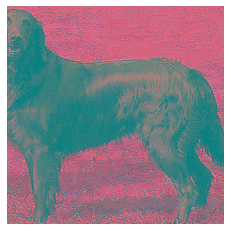

In [ ]:
##### 모든 이미지에 적용하기 전 test
image = cv2.imread(f"/content/drive/MyDrive/멀티캠퍼스/3조/이경희/square/nor/square_nor_1.jpg") 
kernel = np.array([[0, -1, 0],
                [-1, 5,-1],
                [0, -1, 0]]) # 커널 생성
# 이미지를 선명하게 만듦
image_sharp = cv2.filter2D(image, -1, kernel)
image_yuv = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2YUV) # YUV로 변경
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # 히스토그램 평활화 적용
plt.imshow(image_yuv), plt.axis("off") # 이미지 출력
plt.show()

In [ ]:
#### 모든 이미지 선명하게  - set_1
def square_sharp_contrast(name, file_path, save_path):
  file = os.listdir(file_path)

  i = 0
  for img_name in file:
    image = cv2.imread(f"{file_path}/{img_name}") 
    kernel = np.array([[0, -1, 0],
                    [-1, 5,-1],
                    [0, -1, 0]]) # 커널 생성
    # 이미지를 선명하게 만듦
    image_sharp = cv2.filter2D(image, -1, kernel)
    image_yuv = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2YUV) # YUV로 변경
    image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # 히스토그램 평활화 적용
    # save
    i+=1
    cv2.imwrite(f'{save_path}/square_sharp_contrast_{i}.jpg',image_yuv)

## 정상
name = 'nor'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/square/nor'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/square_set_5/nor'
square_sharp_contrast(name,file_path, save_path)

## 비만
name = 'fat'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/square/fat'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/square_set_5/fat'
square_sharp_contrast(name,file_path, save_path)

# train / validation / test 셋 분할

In [ ]:
path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/리트리버'
for folder_name in os.listdir(path):
  base_dir = f'{path}/{folder_name}'
  if folder_name == 'set_8' :
    # # 훈련셋, 검증셋, 테스트셋을 미리 분할하기 위한 폴더 경로
    train_path = os.path.join(base_dir, 'train')
    os.mkdir( train_path )
    val_path = os.path.join(base_dir, 'validation')
    os.mkdir( val_path )
    test_path = os.path.join(base_dir, 'test')
    os.mkdir( test_path )


    # # train 정상 폴더
    train_nor_path = os.path.join(train_path, 'nor')
    os.mkdir( train_nor_path ) # 폴더 생성
    # # train 비만 폴더
    train_fat_path = os.path.join(train_path, 'fat')
    os.mkdir( train_fat_path )

    # # validation 정상 폴더
    val_nor_path = os.path.join(val_path, 'nor')
    os.mkdir( val_nor_path )
    # # validation 비만 폴더
    val_fat_path = os.path.join(val_path, 'fat')
    os.mkdir( val_fat_path )

    # # test 정상 폴더
    test_nor_path = os.path.join(test_path, 'nor')
    os.mkdir( test_nor_path )
    # # test 비만 폴더
    test_fat_path = os.path.join(test_path, 'fat')
    os.mkdir( test_fat_path )

    nor_path = f'{path}/{folder_name}/전처리_정상'
    nor_list = os.listdir(nor_path)
    fat_path = f'{path}/{folder_name}/전처리_비만'
    fat_list = os.listdir(fat_path)

    # -----------------------------------------------------------
    if folder_name == 'set_1' : file_name = 'sharp'
    elif folder_name == 'set_2' : file_name = 'GaussianBlur'
    elif folder_name == 'set_3' : file_name = 'Grayscale_sharp'
    elif folder_name == 'set_4' : file_name = 'Gray_GaussianBlur'
    elif folder_name == 'set_5' : file_name = 'sharp_contrast'
    elif folder_name == 'set_6' : file_name = 'div255'
    elif folder_name == 'set_7' : file_name = 'Gray_Gaussian_canny'
    elif folder_name == 'set_8' : file_name = 'square_sharp_contrast'

    # train용 이미지 복사
    for i in range(0, int(len(nor_list)*0.5)):
      src_path = os.path.join(nor_path, nor_list[i])                 # 원본 파일 경로
      dst_path = os.path.join(train_nor_path, f'{file_name}_nor_{i}.jpg')        # 복사할 파일 경로
      shutil.copyfile( src_path, dst_path )

    for i in range(0, int(len(fat_list)*0.5)):
      src_path = os.path.join(fat_path, fat_list[i])        
      dst_path = os.path.join(train_fat_path, f'{file_name}_fat_{i}.jpg')   
      shutil.copyfile( src_path, dst_path )

    # validation용 이미지 복사
    for i in range(int(len(nor_list)*0.5), int(len(nor_list)*0.75)):
      src_path = os.path.join(nor_path, nor_list[i])        
      dst_path = os.path.join(val_nor_path, f'{file_name}_nor_{i}.jpg')   
      shutil.copyfile( src_path, dst_path )

    for i in range(int(len(fat_list)*0.5), int(len(fat_list)*0.75)):
      src_path = os.path.join(fat_path, fat_list[i])        
      dst_path = os.path.join(val_fat_path, f'{file_name}_fat_{i}.jpg')   
      shutil.copyfile( src_path, dst_path )

    # test용 이미지 복사
    for i in range(int(len(nor_list)*0.75), len(nor_list)):
      src_path = os.path.join(nor_path, nor_list[i])        
      dst_path = os.path.join(test_nor_path, f'{file_name}_nor_{i}.jpg')   
      shutil.copyfile( src_path, dst_path )

    for i in range(int(len(fat_list)*0.75), len(fat_list)):
      src_path = os.path.join(fat_path, fat_list[i])        
      dst_path = os.path.join(test_fat_path, f'{file_name}_fat_{i}.jpg')   
      shutil.copyfile( src_path, dst_path )

In [ ]:
# 잘 복사됐는지 확인
path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/리트리버' 
for fn in os.listdir(path):
  nor_path = f'{path}/{fn}/전처리_정상'
  nor_list = os.listdir(nor_path)
  fat_path = f'{path}/{fn}/전처리_비만'
  fat_list = os.listdir(fat_path)

  ## train 정상 폴더
  train_nor_path = f'{path}/{fn}/train/nor'
  ## train 비만 폴더
  train_fat_path = f'{path}/{fn}/train/nor'

  ## validation 정상 폴더
  val_nor_path = f'{path}/{fn}/validation/fat'
  ## validation 비만 폴더
  val_fat_path = f'{path}/{fn}/validation/nor'

  ## test 정상 폴더
  test_nor_path = f'{path}/{fn}/test/nor'
  ## test 비만 폴더
  test_fat_path = f'{path}/{fn}/test/nor'

  print(f'--------------------------- {fn} ---------------------------')
  print(f'train set : {len(os.listdir(train_nor_path)) + len(os.listdir(train_fat_path))}')
  print(f'validation set : {len(os.listdir(val_nor_path)) + len(os.listdir(val_fat_path))}')
  print(f'test set : {len(os.listdir(test_nor_path)) + len(os.listdir(test_fat_path))}')
  print(f'total set : {len(nor_list) + len(fat_list)}')

--------------------------- set_1 ---------------------------
train set : 576
validation set : 246
test set : 288
total set : 984
--------------------------- set_2 ---------------------------
train set : 578
validation set : 247
test set : 290
total set : 987
--------------------------- set_3 ---------------------------
train set : 578
validation set : 247
test set : 290
total set : 987
--------------------------- set_4 ---------------------------
train set : 578
validation set : 247
test set : 290
total set : 987
--------------------------- set_5 ---------------------------
train set : 576
validation set : 246
test set : 290
total set : 985
--------------------------- set_6 ---------------------------
train set : 578
validation set : 247
test set : 290
total set : 987
--------------------------- set_7 ---------------------------
train set : 868
validation set : 0
test set : 290
total set : 987
--------------------------- set_8 ---------------------------
train set : 598
validation set

NotADirectoryError: ignored